# Analysis of the Titanic shipwreck: Predicting survival through data
### Author:DIBYENDU MONDAL |February 2026
---

## objective:
The goal of this project is to predict which passengers survived the Titanic shipwreck using machine learning model . 
By factors like **age, gender, and ticket class** using which we can uncover the patterns that determined 
who survived .

In [1]:
import pandas as pd

In [2]:
train_df=pd.read_csv("train.csv")

In [3]:
test_df=pd.read_csv("test.csv")

In [4]:
train_df["Age"]=train_df['Age'].fillna(train_df['Age'].median())

In [5]:
train_df['Sex']=train_df['Sex'].map({'male':1,'female':0})

In [6]:
x=train_df[['Age','Sex','Pclass','SibSp','Parch']]

In [7]:
y=train_df[['Survived']]

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(x,y)

C:\Users\KOUSHIK\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=1)

In [10]:
score=model.score(x,y)

In [11]:
score*100

84.0628507295174

In [12]:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].median())

In [13]:
test_df['Sex']=test_df['Sex'].map({'male':1,'female':0})

In [14]:
X_test = test_df[['Age','Sex','Pclass','SibSp','Parch']]

In [15]:
prediction=model.predict(X_test)

In [16]:
submission=pd.DataFrame({"passengerID":test_df['PassengerId'],
                         "survived":prediction})

In [17]:
submission.to_csv('submission.csv',index= False)

In [18]:
stats = [[25, 0, 3, 0, 0]] 

prediction=model.predict(stats)
probability=model.predict_proba(stats) 

if prediction[0] == 1:
    print(f"You would have survived! ,Confidence: {probability[0][1]*100:.1f}%")
else:
    print(f"Sadly, you wouldn't have made it. Risk: {probability[0][0]*100:.1f}%")

You would have survived! ,Confidence: 57.7%


C:\Users\KOUSHIK\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\KOUSHIK\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
train_df['Sex_Label'] = train_df['Sex'].map({1: 'Male', 0: 'Female'})
train_df['Survival_Label'] = train_df['Survived'].map({0: 'No', 1: 'Yes'})

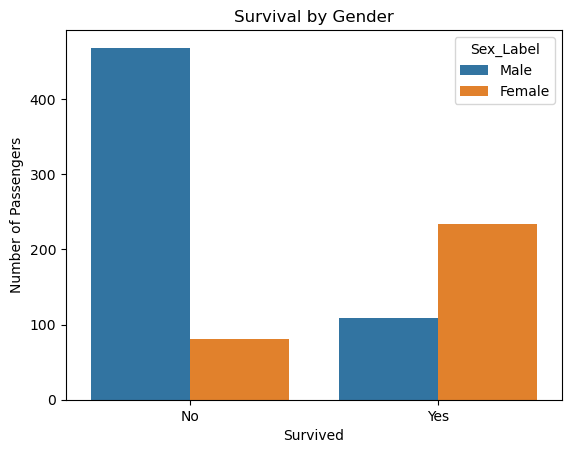

In [21]:
sns.countplot(x='Survival_Label', hue='Sex_Label', data=train_df)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survival by Gender')
plt.show()

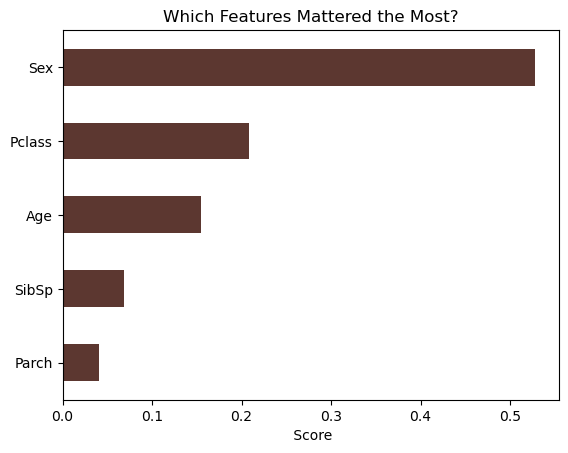

In [22]:
features = ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch']
importances = model.feature_importances_
imp = pd.Series(importances, index=features).sort_values(ascending=True)
imp.plot(kind='barh', color='#5C3730')
plt.title('Which Features Mattered the Most?')
plt.xlabel(' Score')
plt.show()


# Uncovering the Patterns of Survival
After analyzing the data of passengers, my model confirms that:
## The Gender Gap:
Being female was the single biggest advantage. My model relied on the Sex feature more than anything else to make its decisions.
## The Price of a Life:
Even though the model looked at things like age and family size, the Pclass (Passenger Class) was a massive decider and It shows that survival wasnot just about luck,it was about where your cabin was located and how much your ticket cost.

## The "Age" Factor:
It also had a role in decission making While we often hear "women and children first," the data shows that class and gender were actually more predictive than age alone.

**Model Performance:** My predictor is about 84% accurate. While it is not perfect then also it correctly captures the tragic patterns of that night.
